## Redes Neuronais + Backpropagation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   sklearn.neural_network import MLPClassifier
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import accuracy_score

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

In [3]:
m = 3750 # dados de treino

df = pd.read_csv('data_tp1', header=None)

x = np.asarray(np.matrix(df.loc[:,1:]))/255
y = np.asarray(np.array(df.loc[:,0]))

(X_train, X_test, Y_train, Y_test) = train_test_split(x, y)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3750, 784) (1250, 784) (3750,) (1250,)


Utilizaremos a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

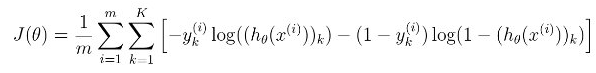

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis, yk(i) representa a saída correta de cada classe k em cada entrada (i), e similarmente (h0(x(i)))k representa a saída dada pela rede neuronal.

Essa é a função log-loss utilizada pelo MLPClassifier do sklearn.

Neste trabalho iremos implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Iremos variar o número de unidades na camada oculta (25, 50, 100).

Além disso, iremos comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, iremos variar a taxa de aprendizado: 0.5, 1, 10.

Aqui iremos criar todas as 36 configurações para o MLPClassifier variando os hiperparâmetros citados:

In [39]:
rn = []

for i in [m, 1, 10, 50]:
    for k in [25, 50, 100]:    
        for j in [0.5, 1, 10]:
            rn.append(MLPClassifier(activation='logistic', hidden_layer_sizes=(k), solver='sgd', learning_rate='constant', 
                                    learning_rate_init=j, batch_size=i, verbose=0, max_iter=1000))

print(rn, len(rn))

[MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=25,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=25,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=25,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=50,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=50,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=50,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_si

In [31]:
labelsG = ["Gradiente Descendente", "Gradiente Descendente Estocástico", "Mini-Batch 10", "Mini-Batch 50"]
labelsO = ["Camada Oculta: 25", "Camada Oculta: 50", "Camada Oculta: 100"]
labelsA = ["Aprendizado: 0.5", "Aprendizado: 1", "Aprendizado: 10"]

## Experimentos

### Gradiente Descendente

MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=25,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=25,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=25,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=50,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=50,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=50,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=3750, hidden_layer_sizes=100

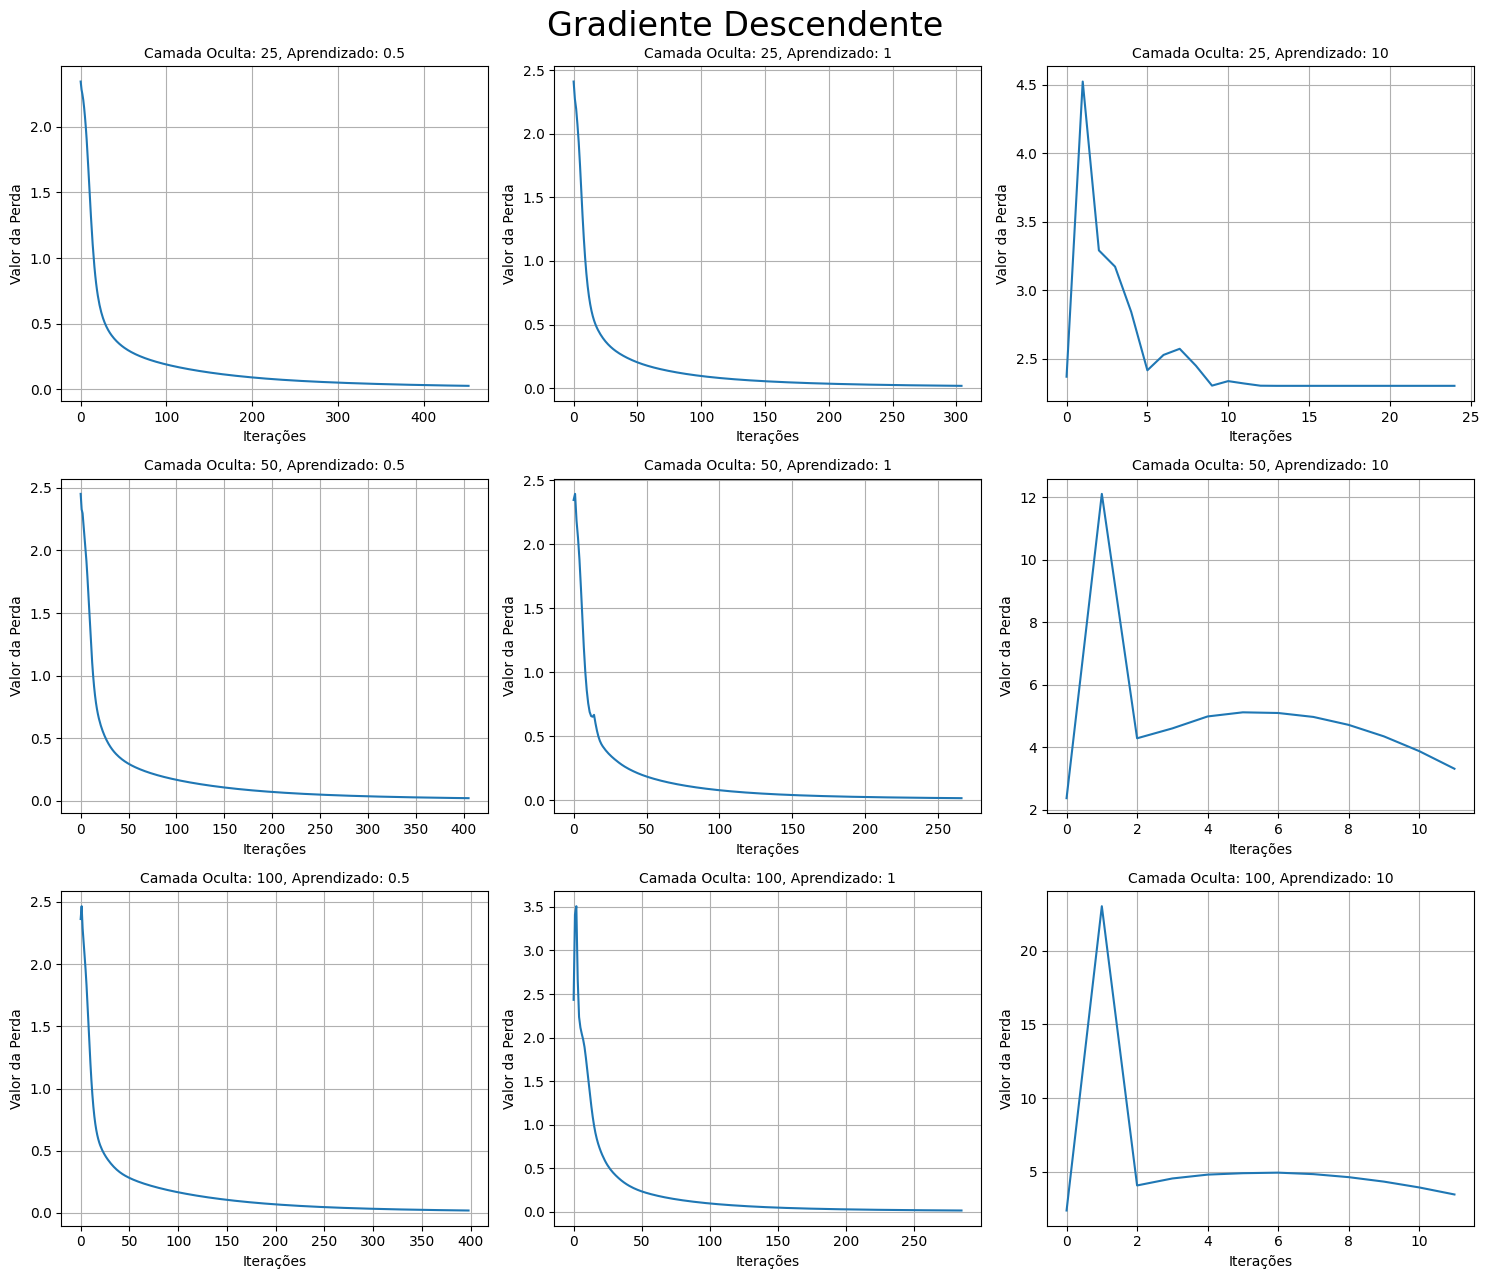

In [40]:
figure = plt.figure(figsize=(15,13))
figure.suptitle("{0}".format(labelsG[0]), fontsize=24)
i = 0
count = 0
for k in labelsO:
    for j in labelsA:
        print(rn[count])
        rn[count].fit(X_train, Y_train)
        
        ax = plt.subplot(3,3,i+1)
        plt.ylabel("Valor da Perda", fontsize=10)
        plt.title("{0}, {1}".format(k,j), fontsize=10)
        plt.xlabel("Iterações", fontsize=10)
        plt.grid()

        ax.plot(rn[count].loss_curve_)
        count+=1
        i+=1
plt.tight_layout()

In [41]:
count = 0
for k in labelsO:
    for j in labelsA:
        print("{0}, {1}".format(k,j))
        print("Menor Perda: " + str(rn[count].best_loss_.round(4)) + " | Erro Empírico: " + str(1 - accuracy_score(Y_train, rn[count].predict(X_train)))
              + " | Erro do Teste: " + str(1 - accuracy_score(Y_test, rn[count].predict(X_test))))
        print()
        count+=1

Camada Oculta: 25, Aprendizado: 0.5
Menor Perda: 0.0271 | Erro Empírico: 0.0008000000000000229 | Erro do Teste: 0.07440000000000002

Camada Oculta: 25, Aprendizado: 1
Menor Perda: 0.0184 | Erro Empírico: 0.0005333333333333856 | Erro do Teste: 0.06720000000000004

Camada Oculta: 25, Aprendizado: 10
Menor Perda: 2.3004 | Erro Empírico: 0.8877333333333334 | Erro do Teste: 0.88

Camada Oculta: 50, Aprendizado: 0.5
Menor Perda: 0.0219 | Erro Empírico: 0.0002666666666666373 | Erro do Teste: 0.07120000000000004

Camada Oculta: 50, Aprendizado: 1
Menor Perda: 0.0143 | Erro Empírico: 0.0 | Erro do Teste: 0.06879999999999997

Camada Oculta: 50, Aprendizado: 10
Menor Perda: 2.3756 | Erro Empírico: 0.8946666666666667 | Erro do Teste: 0.9064

Camada Oculta: 100, Aprendizado: 0.5
Menor Perda: 0.0198 | Erro Empírico: 0.0 | Erro do Teste: 0.06640000000000001

Camada Oculta: 100, Aprendizado: 1
Menor Perda: 0.0147 | Erro Empírico: 0.0 | Erro do Teste: 0.0736

Camada Oculta: 100, Aprendizado: 10
Menor P

- Para o Gradiente Descendente é possível observar que o algoritmo encontra um modelo com uma perda bem baixa para os casos em que o aprendizado é 0.5 ou 1.
- Para a taxa 0.5 e 1 o erro empírico foi o bem próximo e baixo variando o número de nós da camada oculta, porém o erro do teste é bem diferente do erro empírico, isso é devido ao Overfiting.
- Já para os casos em que o aprendizado é 10, que é muito alto, ocorrem oscilações grandes que fazem com que a perda seja alta.
- Para um Erro Empírico alto, ele tende a ser uma boa aproximação do Erro do Teste, porém não é um modelo útil. Isso é devido ao Underfiting.
- Um ponto interessante a se observar é que a convergência ocorre mais rapidamente com a taxa de aprendizado maior, porém se ela for muito grande ocorrem oscilações muito grandes na perda e pode ser que ela acabe em uma perda alta, como ocorreu.

### Gradiente Descendente Estocástico

MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=25,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=25,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=25,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=50,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=50,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=50,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=100,
              learn

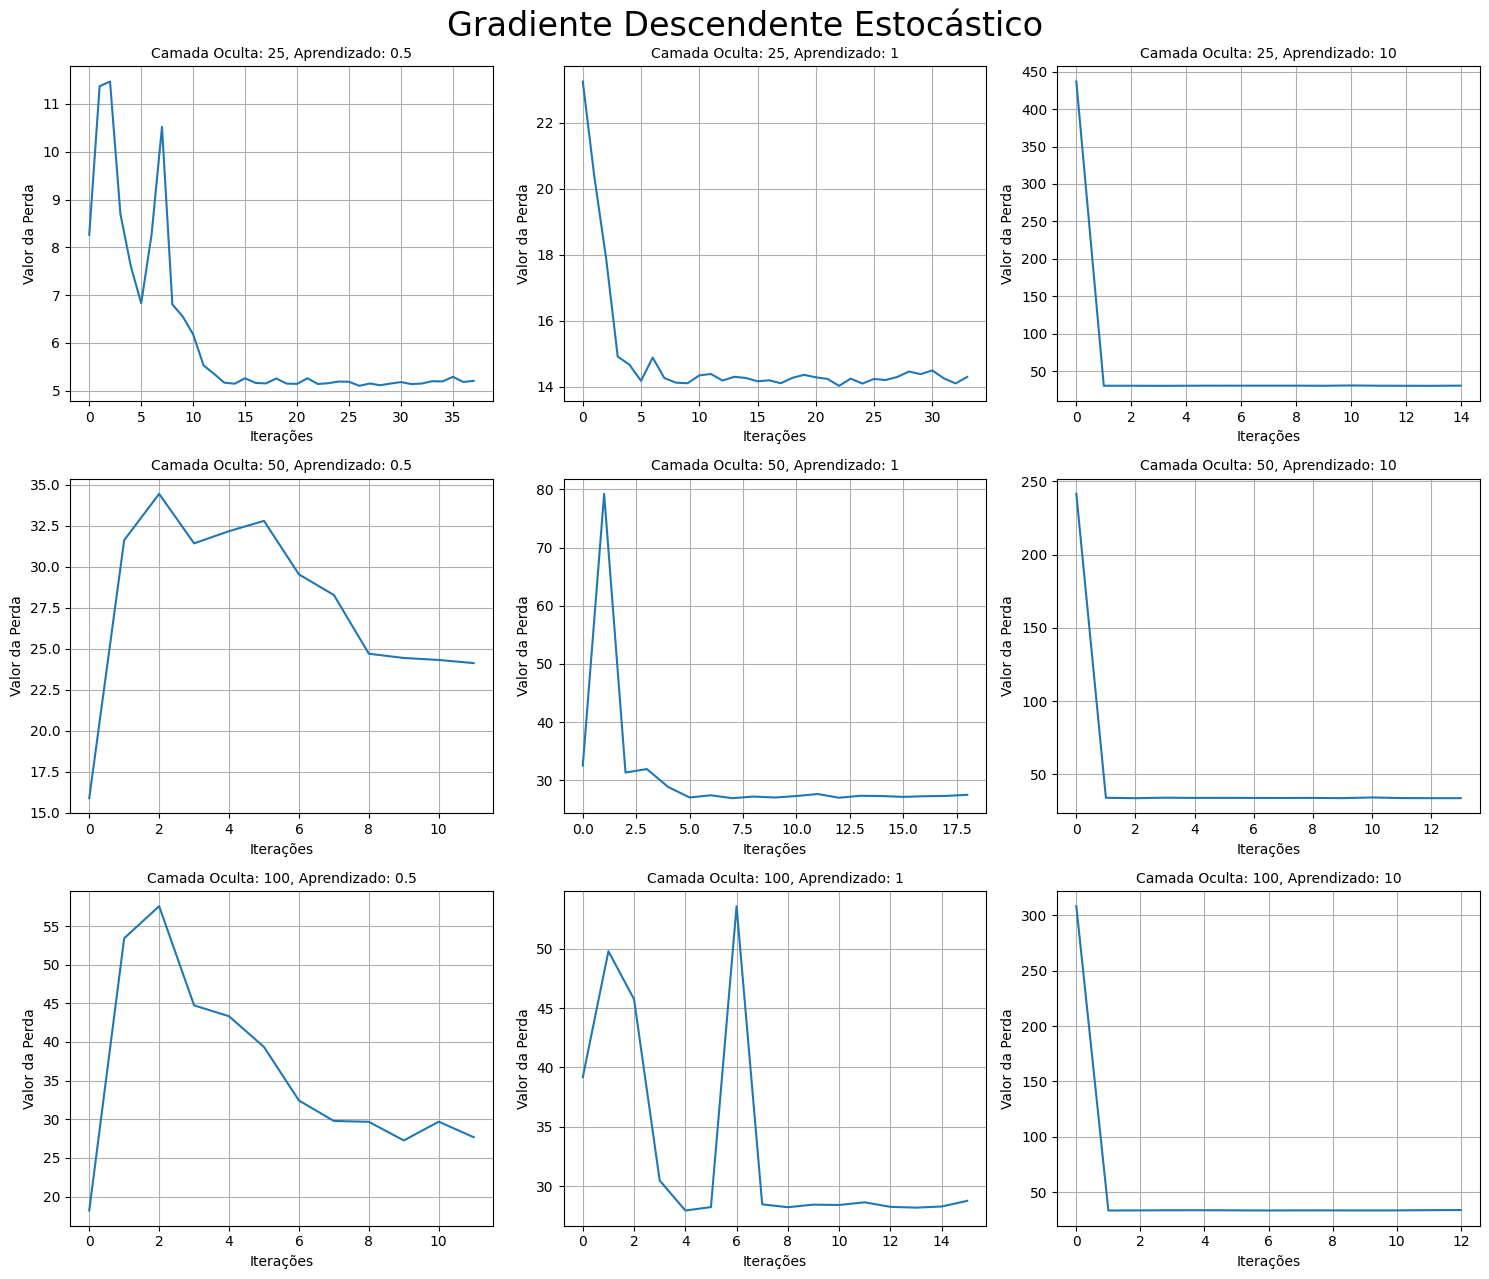

In [44]:
figure = plt.figure(figsize=(15,13))
figure.suptitle("{0}".format(labelsG[1]), fontsize=24)
i = 0
count = 9
for k in labelsO:
    for j in labelsA:
        print(rn[count])
        rn[count].fit(X_train, Y_train)
        
        ax = plt.subplot(3,3,i+1)
        plt.ylabel("Valor da Perda", fontsize=10)
        plt.title("{0}, {1}".format(k,j), fontsize=10)
        plt.xlabel("Iterações", fontsize=10)
        plt.grid()

        ax.plot(rn[count].loss_curve_)
        count+=1
        i+=1
plt.tight_layout()

In [45]:
count = 9
for k in labelsO:
    for j in labelsA:
        print("{0}, {1}".format(k,j))
        print("Menor Perda: " + str(rn[count].best_loss_.round(4)) + " | Erro Empírico: " + str(1 - accuracy_score(Y_train, rn[count].predict(X_train)))
              + " | Erro do Teste: " + str(1 - accuracy_score(Y_test, rn[count].predict(X_test))))
        print()
        count+=1

Camada Oculta: 25, Aprendizado: 0.5
Menor Perda: 5.1035 | Erro Empírico: 0.8946666666666667 | Erro do Teste: 0.9064

Camada Oculta: 25, Aprendizado: 1
Menor Perda: 14.0307 | Erro Empírico: 0.8877333333333334 | Erro do Teste: 0.88

Camada Oculta: 25, Aprendizado: 10
Menor Perda: 30.6331 | Erro Empírico: 0.9106666666666666 | Erro do Teste: 0.9032

Camada Oculta: 50, Aprendizado: 0.5
Menor Perda: 15.8902 | Erro Empírico: 0.8877333333333334 | Erro do Teste: 0.88

Camada Oculta: 50, Aprendizado: 1
Menor Perda: 26.932 | Erro Empírico: 0.9106666666666666 | Erro do Teste: 0.9032

Camada Oculta: 50, Aprendizado: 10
Menor Perda: 33.7357 | Erro Empírico: 0.8965333333333333 | Erro do Teste: 0.9104

Camada Oculta: 100, Aprendizado: 0.5
Menor Perda: 18.1937 | Erro Empírico: 0.9085333333333333 | Erro do Teste: 0.9064

Camada Oculta: 100, Aprendizado: 1
Menor Perda: 27.9355 | Erro Empírico: 0.8965333333333333 | Erro do Teste: 0.9104

Camada Oculta: 100, Aprendizado: 10
Menor Perda: 33.6131 | Erro Empí

- Com os hiperparâmetros utilizados podemos perceber que o algoritmo não encontrou modelos bons. Isso pode ser devido aos valores altos de taxa de aprendizado. O algoritmo também pode ter ficado "preso" em mínimos locais.
- Observamos novamente que Erros Empíricos altos aproximam bem o Erro do Teste. (Underfiting)

### Mini-Batch 10

MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=25,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=25,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=25,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=50,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=50,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=50,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=100,
            

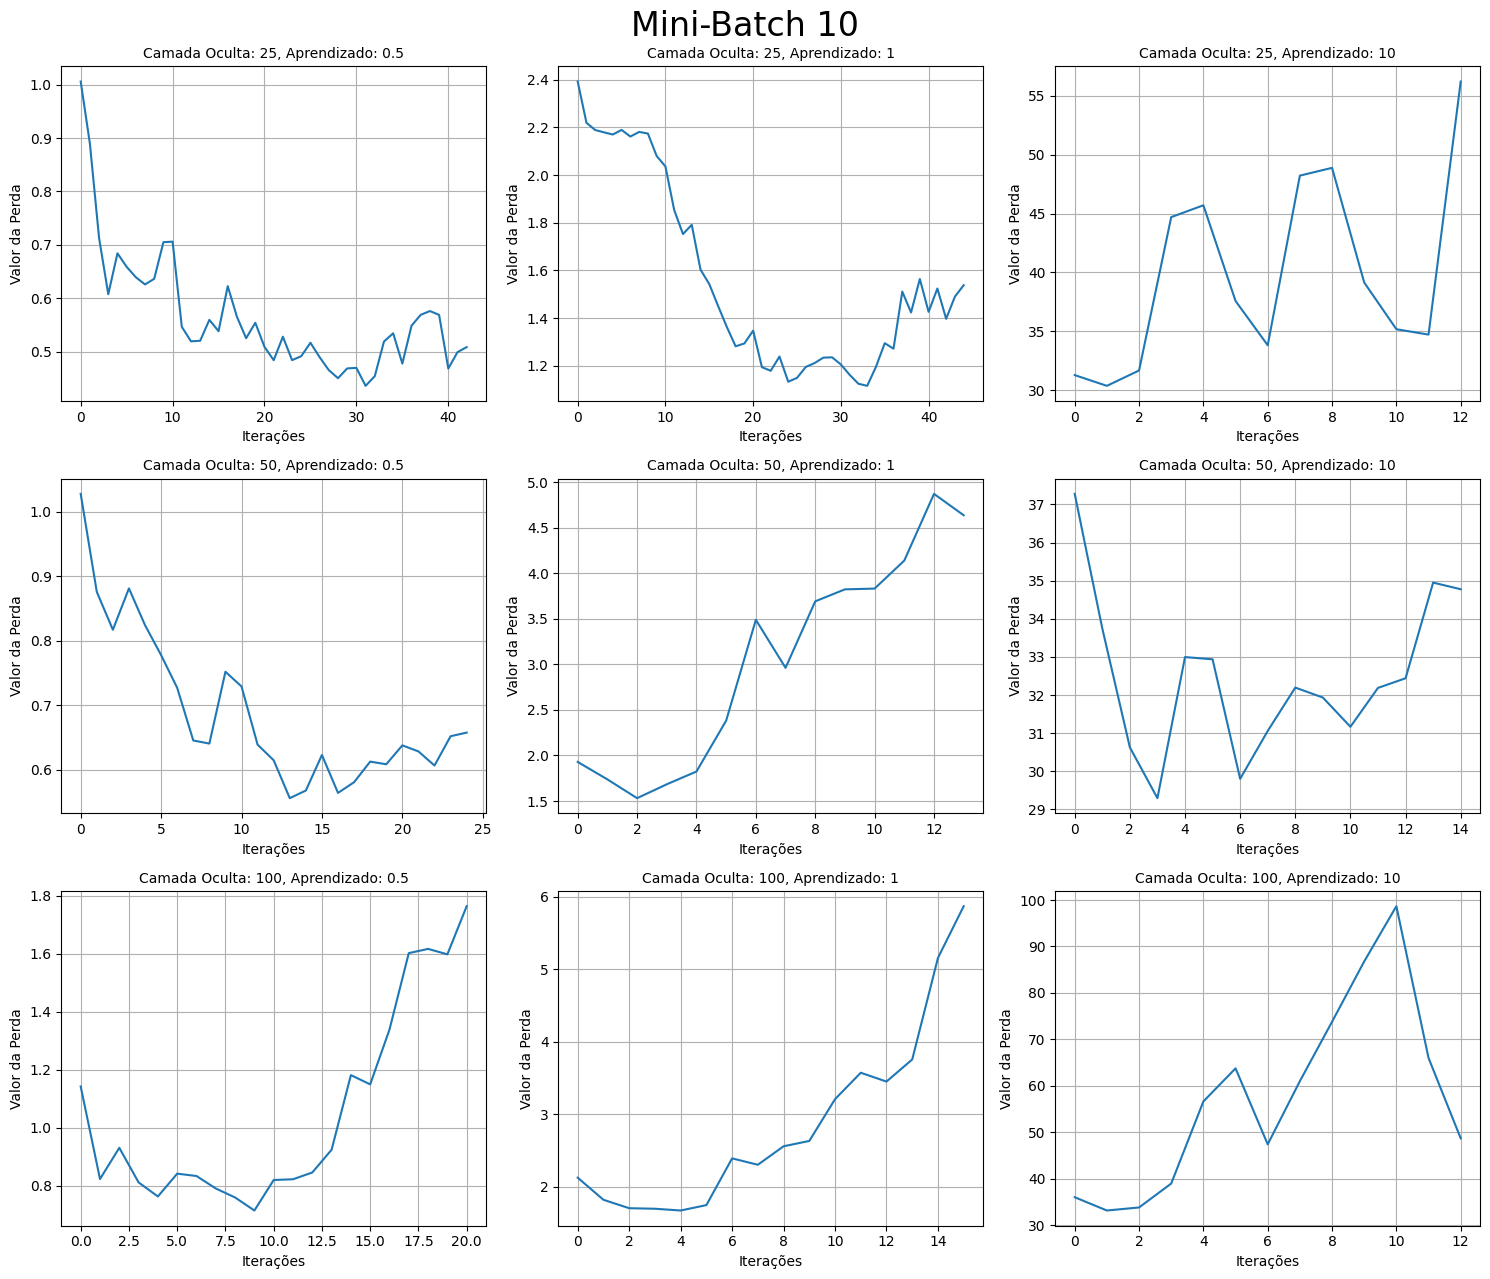

In [46]:
figure = plt.figure(figsize=(15,13))
figure.suptitle("{0}".format(labelsG[2]), fontsize=24)
i = 0
count = 18
for k in labelsO:
    for j in labelsA:
        print(rn[count])
        rn[count].fit(X_train, Y_train)
        
        ax = plt.subplot(3,3,i+1)
        plt.ylabel("Valor da Perda", fontsize=10)
        plt.title("{0}, {1}".format(k,j), fontsize=10)
        plt.xlabel("Iterações", fontsize=10)
        plt.grid()

        ax.plot(rn[count].loss_curve_)
        count+=1
        i+=1
plt.tight_layout()

In [47]:
count = 18
for k in labelsO:
    for j in labelsA:
        print("{0}, {1}".format(k,j))
        print("Menor Perda: " + str(rn[count].best_loss_.round(4)) + " | Erro Empírico: " + str(1 - accuracy_score(Y_train, rn[count].predict(X_train)))
              + " | Erro do Teste: " + str(1 - accuracy_score(Y_test, rn[count].predict(X_test))))
        print()
        count+=1

Camada Oculta: 25, Aprendizado: 0.5
Menor Perda: 0.4356 | Erro Empírico: 0.0762666666666667 | Erro do Teste: 0.124

Camada Oculta: 25, Aprendizado: 1
Menor Perda: 1.1153 | Erro Empírico: 0.20399999999999996 | Erro do Teste: 0.2248

Camada Oculta: 25, Aprendizado: 10
Menor Perda: 30.3847 | Erro Empírico: 0.8672 | Erro do Teste: 0.868

Camada Oculta: 50, Aprendizado: 0.5
Menor Perda: 0.5557 | Erro Empírico: 0.11306666666666665 | Erro do Teste: 0.13280000000000003

Camada Oculta: 50, Aprendizado: 1
Menor Perda: 1.5312 | Erro Empírico: 0.3773333333333333 | Erro do Teste: 0.3944

Camada Oculta: 50, Aprendizado: 10
Menor Perda: 29.294 | Erro Empírico: 0.8946666666666667 | Erro do Teste: 0.9064

Camada Oculta: 100, Aprendizado: 0.5
Menor Perda: 0.7139 | Erro Empírico: 0.2128 | Erro do Teste: 0.25360000000000005

Camada Oculta: 100, Aprendizado: 1
Menor Perda: 1.6727 | Erro Empírico: 0.4906666666666667 | Erro do Teste: 0.48719999999999997

Camada Oculta: 100, Aprendizado: 10
Menor Perda: 33.13

- Aqui ocorre algo parecido com o Grandiente Descendente Estocástico, onde os hiperparâmetros não foram escolhidos bem para realização dos modelos.
- Além disso, também é possível perceber que a perda aumentou com taxas de aprendizado maiores, e que houveram grandes oscilações entre as iterações, que foram maiores nas taxas de aprendizado maiores.
- Observamos novamente que Erros Empíricos altos aproximam bem o Erro do Teste. (Underfiting)

### Mini-Batch 50

MLPClassifier(activation='logistic', batch_size=50, hidden_layer_sizes=25,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=50, hidden_layer_sizes=25,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=50, hidden_layer_sizes=25,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=50, hidden_layer_sizes=50,
              learning_rate_init=0.5, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=50, hidden_layer_sizes=50,
              learning_rate_init=1, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=50, hidden_layer_sizes=50,
              learning_rate_init=10, max_iter=1000, solver='sgd', verbose=0)
MLPClassifier(activation='logistic', batch_size=50, hidden_layer_sizes=100,
            

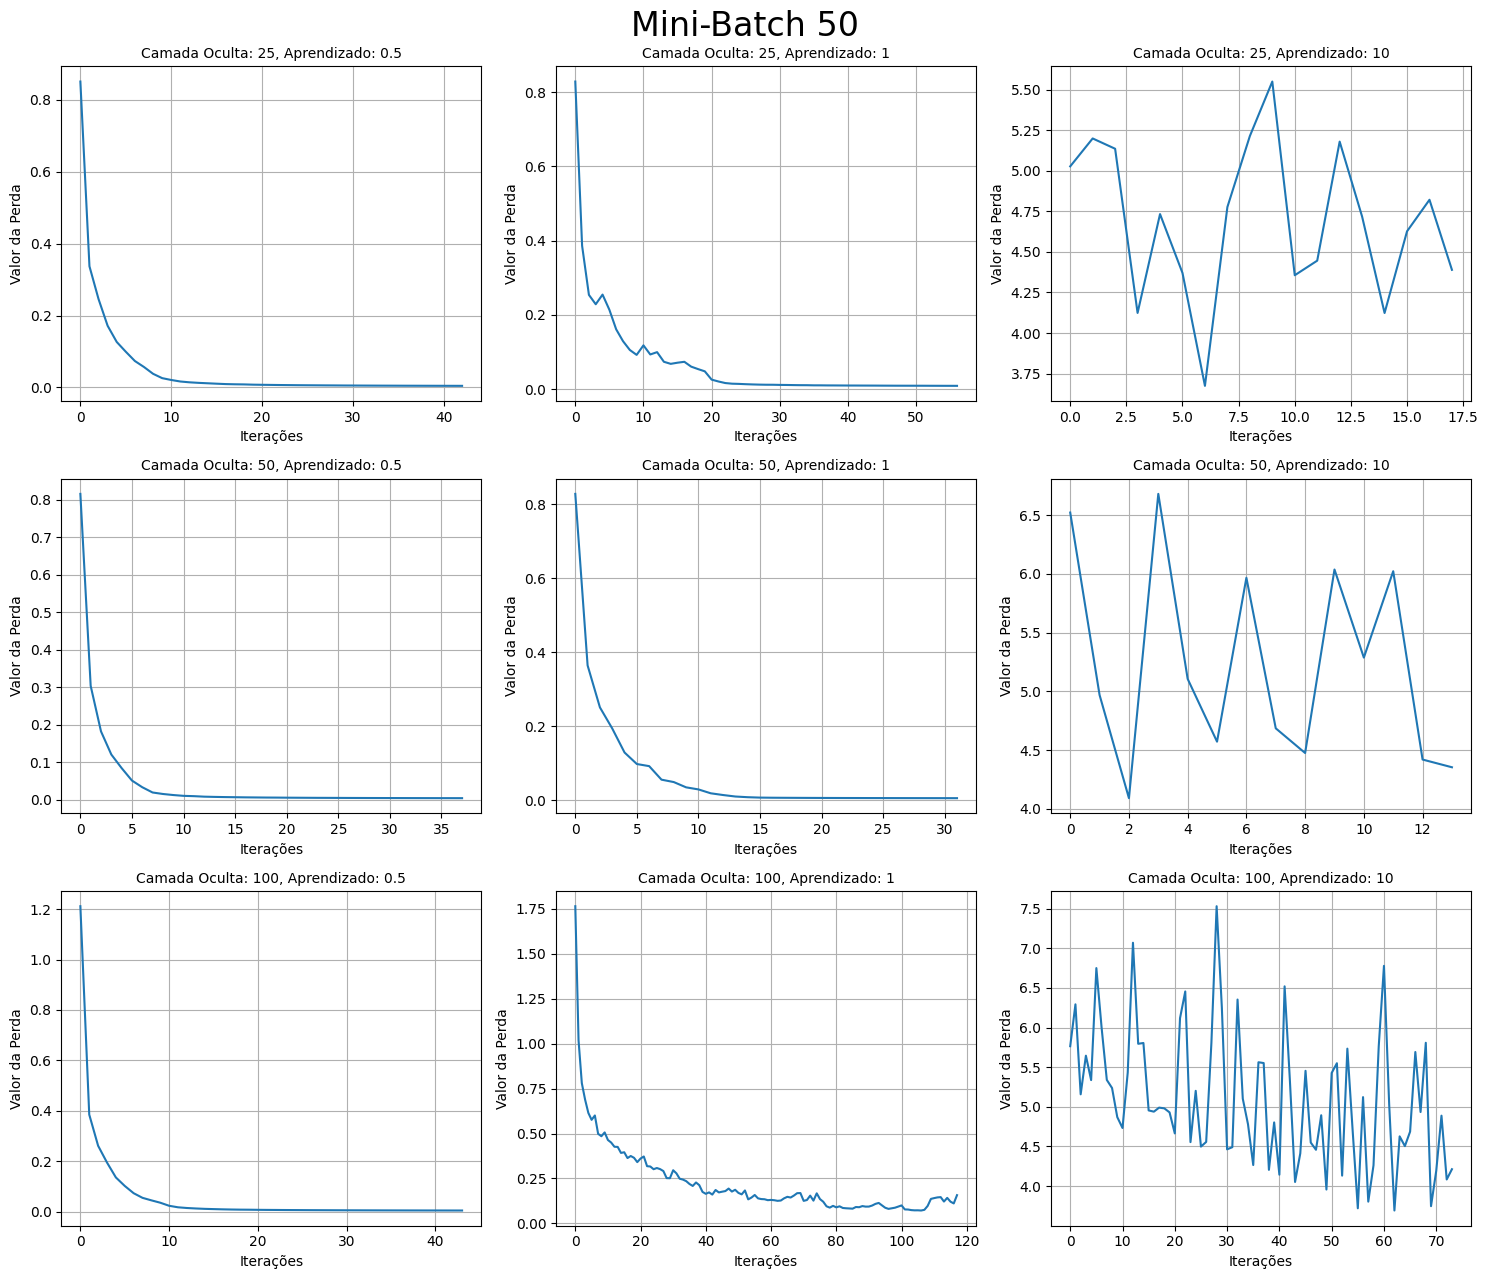

In [ ]:
figure = plt.figure(figsize=(15,13))
figure.suptitle("{0}".format(labelsG[3]), fontsize=24)
i = 0
count = 27
for k in labelsO:
    for j in labelsA:
        print(rn[count])
        rn[count].fit(X_train, Y_train)
        
        ax = plt.subplot(3,3,i+1)
        plt.ylabel("Valor da Perda", fontsize=10)
        plt.title("{0}, {1}".format(k,j), fontsize=10)
        plt.xlabel("Iterações", fontsize=10)
        plt.grid()

        ax.plot(rn[count].loss_curve_)
        count+=1
        i+=1
plt.tight_layout()

In [ ]:
count = 27
for k in labelsO:
    for j in labelsA:
        print("{0}, {1}".format(k,j))
        print("Menor Perda: " + str(rn[count].best_loss_.round(4)) + " | Erro Empírico: " + str(1 - accuracy_score(Y_train, rn[count].predict(X_train)))
              + " | Erro do Teste: " + str(1 - accuracy_score(Y_test, rn[count].predict(X_test))))
        print()
        count+=1

Camada Oculta: 25, Aprendizado: 0.5
Menor Perda: 0.0046 | Erro Empírico: 0.0 | Erro do Teste: 0.0736

Camada Oculta: 25, Aprendizado: 1
Menor Perda: 0.0088 | Erro Empírico: 0.0 | Erro do Teste: 0.0776

Camada Oculta: 25, Aprendizado: 10
Menor Perda: 3.6743 | Erro Empírico: 0.8965333333333333 | Erro do Teste: 0.9104

Camada Oculta: 50, Aprendizado: 0.5
Menor Perda: 0.0036 | Erro Empírico: 0.0 | Erro do Teste: 0.060799999999999965

Camada Oculta: 50, Aprendizado: 1
Menor Perda: 0.0056 | Erro Empírico: 0.0 | Erro do Teste: 0.054400000000000004

Camada Oculta: 50, Aprendizado: 10
Menor Perda: 4.0909 | Erro Empírico: 0.8946666666666667 | Erro do Teste: 0.9064

Camada Oculta: 100, Aprendizado: 0.5
Menor Perda: 0.0046 | Erro Empírico: 0.0 | Erro do Teste: 0.06879999999999997

Camada Oculta: 100, Aprendizado: 1
Menor Perda: 0.0719 | Erro Empírico: 0.03839999999999999 | Erro do Teste: 0.15759999999999996

Camada Oculta: 100, Aprendizado: 10
Menor Perda: 3.6927 | Erro Empírico: 0.896266666666666

- Para o Mini-Batch 50 é possível observar que o algoritmo encontra uma perda bem baixa para os casos em que o aprendizado é 0.5 ou 1.
- No aprendizado 1 é possível perceber alguns ruídos na curva pelo seu valor mais elevado.
- Já para os casos em que o aprendizado é 10, que é muito alto, ocorrem oscilações grandes e é possível observar que não houve convergência.
- Aqui podemos ver novamente que quando o algoritmo tenta diminuir ao máximo o Erro Empírico, o Erro do Teste diverge, ficando bem diferente do Erro Empírico. (Overfiting)
- Também podemos observar novamente que quando o Erro Empírico é alto ele tende a ser uma boa aproximação do Erro do Teste. (Underfiting)

# Conclusões

- A partir dos experimentos foi possível observar o impacto dos hiperparâmetros no algoritmo e na eficiência de encontrar modelos bons. Os experimentos devem ser feitos para encontrar a melhor forma de utiizar o algoritmo e encontrar um bom modelo que represente bem o problema.
- Um ponto interessante a ser observado foi a presença do Overfiting conforme mais iterações eram utilizadas para realização do modelo, que mostram que a medida que o Erro Empírico se torna menor, ele começa a se tornar uma aproximação ruim do Erro do Teste. Com isso, torna-se necessário escolher um limiar entre erro e complexidade.
- Também foi possível notar o Underfiting, onde o Erro Empírico é uma boa aproximação do Erro do Teste, porém eles são altos.
- É notável que a escolha dessas taxas de aprendizado foi um ponto negativo em alguns experimentos e foi possível notar o impacto de seu aumento nos modelos.
- Um ponto que pode ter contribuido para que alguns modelos não tenham se saído bem é a quantidade de dados de treino. Com mais dados o treinamento seria melhor e contribuiria para uma melhor precisão dos modelos.